In [1]:
import numpy as np
import MDP
import RL

import sys

''' Construct a simple maze MDP

  Grid world layout:

  ---------------------
  |  0 |  1 |  2 |  3 |
  ---------------------
  |  4 |  5 |  6 |  7 |
  ---------------------
  |  8 |  9 | 10 | 11 |
  ---------------------
  | 12 | 13 | 14 | 15 |
  ---------------------

  Goal state: 15
  Bad state: 9
  End state: 16

  The end state is an absorbing state that the agent transitions
  to after visiting the goal state.

  There are 17 states in total (including the end state)
  and 4 actions (up, down, left, right).'''

# Transition function: |A| x |S| x |S'| array
T = np.zeros([4,17,17])
a = 0.8;  # intended move
b = 0.1;  # lateral move

# up (a = 0)

T[0,0,0] = a+b;
T[0,0,1] = b;

T[0,1,0] = b;
T[0,1,1] = a;
T[0,1,2] = b;

T[0,2,1] = b;
T[0,2,2] = a;
T[0,2,3] = b;

T[0,3,2] = b;
T[0,3,3] = a+b;

T[0,4,4] = b;
T[0,4,0] = a;
T[0,4,5] = b;

T[0,5,4] = b;
T[0,5,1] = a;
T[0,5,6] = b;

T[0,6,5] = b;
T[0,6,2] = a;
T[0,6,7] = b;

T[0,7,6] = b;
T[0,7,3] = a;
T[0,7,7] = b;

T[0,8,8] = b;
T[0,8,4] = a;
T[0,8,9] = b;

T[0,9,8] = b;
T[0,9,5] = a;
T[0,9,10] = b;

T[0,10,9] = b;
T[0,10,6] = a;
T[0,10,11] = b;

T[0,11,10] = b;
T[0,11,7] = a;
T[0,11,11] = b;

T[0,12,12] = b;
T[0,12,8] = a;
T[0,12,13] = b;

T[0,13,12] = b;
T[0,13,9] = a;
T[0,13,14] = b;

T[0,14,13] = b;
T[0,14,10] = a;
T[0,14,15] = b;

T[0,15,16] = 1;
T[0,16,16] = 1;

# down (a = 1)

T[1,0,0] = b;
T[1,0,4] = a;
T[1,0,1] = b;

T[1,1,0] = b;
T[1,1,5] = a;
T[1,1,2] = b;

T[1,2,1] = b;
T[1,2,6] = a;
T[1,2,3] = b;

T[1,3,2] = b;
T[1,3,7] = a;
T[1,3,3] = b;

T[1,4,4] = b;
T[1,4,8] = a;
T[1,4,5] = b;

T[1,5,4] = b;
T[1,5,9] = a;
T[1,5,6] = b;

T[1,6,5] = b;
T[1,6,10] = a;
T[1,6,7] = b;

T[1,7,6] = b;
T[1,7,11] = a;
T[1,7,7] = b;

T[1,8,8] = b;
T[1,8,12] = a;
T[1,8,9] = b;

T[1,9,8] = b;
T[1,9,13] = a;
T[1,9,10] = b;

T[1,10,9] = b;
T[1,10,14] = a;
T[1,10,11] = b;

T[1,11,10] = b;
T[1,11,15] = a;
T[1,11,11] = b;

T[1,12,12] = a+b;
T[1,12,13] = b;

T[1,13,12] = b;
T[1,13,13] = a;
T[1,13,14] = b;

T[1,14,13] = b;
T[1,14,14] = a;
T[1,14,15] = b;

T[1,15,16] = 1;
T[1,16,16] = 1;

# left (a = 2)

T[2,0,0] = a+b;
T[2,0,4] = b;

T[2,1,1] = b;
T[2,1,0] = a;
T[2,1,5] = b;

T[2,2,2] = b;
T[2,2,1] = a;
T[2,2,6] = b;

T[2,3,3] = b;
T[2,3,2] = a;
T[2,3,7] = b;

T[2,4,0] = b;
T[2,4,4] = a;
T[2,4,8] = b;

T[2,5,1] = b;
T[2,5,4] = a;
T[2,5,9] = b;

T[2,6,2] = b;
T[2,6,5] = a;
T[2,6,10] = b;

T[2,7,3] = b;
T[2,7,6] = a;
T[2,7,11] = b;

T[2,8,4] = b;
T[2,8,8] = a;
T[2,8,12] = b;

T[2,9,5] = b;
T[2,9,8] = a;
T[2,9,13] = b;

T[2,10,6] = b;
T[2,10,9] = a;
T[2,10,14] = b;

T[2,11,7] = b;
T[2,11,10] = a;
T[2,11,15] = b;

T[2,12,8] = b;
T[2,12,12] = a+b;

T[2,13,9] = b;
T[2,13,12] = a;
T[2,13,13] = b;

T[2,14,10] = b;
T[2,14,13] = a;
T[2,14,14] = b;

T[2,15,16] = 1;
T[2,16,16] = 1;

# right (a = 3)

T[3,0,0] = b;
T[3,0,1] = a;
T[3,0,4] = b;

T[3,1,1] = b;
T[3,1,2] = a;
T[3,1,5] = b;

T[3,2,2] = b;
T[3,2,3] = a;
T[3,2,6] = b;

T[3,3,3] = a+b;
T[3,3,7] = b;

T[3,4,0] = b;
T[3,4,5] = a;
T[3,4,8] = b;

T[3,5,1] = b;
T[3,5,6] = a;
T[3,5,9] = b;

T[3,6,2] = b;
T[3,6,7] = a;
T[3,6,10] = b;

T[3,7,3] = b;
T[3,7,7] = a;
T[3,7,11] = b;

T[3,8,4] = b;
T[3,8,9] = a;
T[3,8,12] = b;

T[3,9,5] = b;
T[3,9,10] = a;
T[3,9,13] = b;

T[3,10,6] = b;
T[3,10,11] = a;
T[3,10,14] = b;

T[3,11,7] = b;
T[3,11,11] = a;
T[3,11,15] = b;

T[3,12,8] = b;
T[3,12,13] = a;
T[3,12,12] = b;

T[3,13,9] = b;
T[3,13,14] = a;
T[3,13,13] = b;

T[3,14,10] = b;
T[3,14,15] = a;
T[3,14,14] = b;

T[3,15,16] = 1;
T[3,16,16] = 1;

# Reward function: |A| x |S| array
R = -1 * np.ones([4,17]);

# set rewards
R[:,15] = 100;  # goal state
R[:,9] = -70;   # bad state
R[:,16] = 0;    # end state

# Discount factor: scalar in [0,1)
discount = 0.95

# MDP object
mdp = MDP.MDP(T,R,discount)

# RL problem
rlProblem = RL.RL(mdp,np.random.normal)

### Question 1

In [2]:
def check_for_goodness(policy):
  ''' based on my preception of the grid, is the policy good?
  policy: current policy to evaluate
  '''
  good_states = []
  bad_states = []
  for state,action in enumerate(policy):
    if state == 9 or state == 15 or state == 16:
      good_states.append(state) #9 wouldn't have converged as all states will try to avoid it so the n(s,a) for state-9 is not close to inifinite
    elif state <= 11 and state != 5 and action == 1:
      good_states.append(state)
    elif state <=14 and state != 8 and state != 3 and state != 7 and state != 11 and action == 3:
      good_states.append(state)
    elif state == 5 and action != 1:
      good_states.append(state)
    elif state == 8 and action != 3: #the transition prob for T[2,8,8]=a which makes it think left will help stay in 8
      good_states.append(state)
    else:
      bad_states.append(state)
  assert len(good_states) + len(bad_states) == len(policy), "Length of the states don't match with policy"
  if len(good_states) == len(policy):
    return True, None
  return False, bad_states

def turn_towards_pit(policy):
  '''soft goodness. any action is OK in the policy as long as the policy doesn't end up in the pit
  policy: current policy to evaluate
  '''
  for state,action in enumerate(policy):
    if state == 5 and action == 1:
      return True
    elif state == 8 and action == 3:
      return True
    elif state == 13 and action == 0:
      return True
    elif state == 10 and action == 2:
      return True
  return False

def policy_reach_terminal(policy, s0=0, nSteps=100):
  '''Does the current policy reach terminal state within one episode?
  policy: current policy to evaluate
  '''
  state = s0
  total_reward = 0
  for idx in range(nSteps):
    action = policy[state]
    reward, state_p = rlProblem.sampleRewardAndNextState(state, action)
    state = state_p
    total_reward += reward
    if state == 16:
      return True, total_reward
  return False, total_reward

def print_policy_word(policy, epsilon):
  policy_word = []
  for state,action in enumerate(policy):
    if action == 0:
      policy_word.append(str(state)+':up')
    elif action == 1:
      policy_word.append(str(state)+':down')
    elif action == 2:
      policy_word.append(str(state)+':left')
    elif action == 3:
      policy_word.append(str(state)+':right')
    else:
      print ("[ERROR] wrong action chosen in policy: \n{}".format(policy))
      exit(-1)
  assert len(policy) == len(policy_word), "Length of policy_word doesn't match length of policy"
  goodness, bad_states = check_for_goodness(policy)
  terminate, total_reward = policy_reach_terminal(policy)
  print ("\n------------------------------ epsilon: {} -------------------------------------".format(epsilon))
  print ("TERMINATE: {}, GOODNESS: {}, SOFT_GOODNESS: {}\nbad states: {}, Total Reward: {}\n{}".format(\
    terminate, goodness, not turn_towards_pit(policy), bad_states,\
    total_reward, policy_word))
  return

# Test Q-learning
[Q,policy] = rlProblem.qLearning(s0=0,initialQ=np.zeros([mdp.nActions,mdp.nStates]),nEpisodes=200,nSteps=100,epsilon=0.05)
print_policy_word(policy, epsilon=0.05)
print ("\nQ-learning results")
print (Q)
print (policy)
[Q,policy] = rlProblem.qLearning(s0=0,initialQ=np.zeros([mdp.nActions,mdp.nStates]),nEpisodes=200,nSteps=100,epsilon=0.1)
print_policy_word(policy, epsilon=0.1)
print ("\nQ-learning results")
print (Q)
print (policy)
[Q,policy] = rlProblem.qLearning(s0=0,initialQ=np.zeros([mdp.nActions,mdp.nStates]),nEpisodes=200,nSteps=100,epsilon=0.3)
print_policy_word(policy, epsilon=0.3)
print ("\nQ-learning results")
print (Q)
print (policy)
[Q,policy] = rlProblem.qLearning(s0=0,initialQ=np.zeros([mdp.nActions,mdp.nStates]),nEpisodes=200,nSteps=100,epsilon=0.5)
print_policy_word(policy, epsilon=0.5)
print ("\nQ-learning results")
print (Q)
print (policy)


------------------------------ epsilon: 0.05 -------------------------------------
TERMINATE: True, GOODNESS: False, SOFT_GOODNESS: True
bad states: [7], Total Reward: 94.76399441293478
['0:down', '1:right', '2:down', '3:down', '4:down', '5:up', '6:down', '7:left', '8:down', '9:right', '10:right', '11:down', '12:right', '13:right', '14:right', '15:up', '16:right']

Q-learning results
[[ -1.91207157e+00  -2.39450407e+00  -2.00243720e+00  -2.64936729e+00
   -9.74574526e-01  -1.90068492e+00  -1.56528746e+00   3.32605616e-01
   -5.66540580e+00  -7.07148223e+01   1.63305629e+01  -1.08592284e+00
    1.61694558e+01  -1.90433174e+01   3.05465529e+01   1.00596595e+02
    5.29944893e-01]
 [  5.70790403e+00  -2.30240246e+00   3.00035561e+01   1.90419669e+01
    1.74069923e+01  -2.02045355e+01   4.95333874e+01  -1.68968267e+00
    3.49512793e+01  -7.16998656e+01  -3.39977579e+01   9.16426479e+01
    1.14976148e+01   4.20292443e+01   2.08949143e+01   1.00115194e+02
    5.36582743e-01]
 [ -2.298159

Above we can find results for using Q-learning in the maze environment. The output contains the final policy generated by the Q-learning algorithm in nEpisodes($200$) and nSteps($100$). The results are explained below:
* TERMINATE: function checks if the final policy generated by Q-learning terminates at box 15/16 and receive final reward of 100
* GOODNESS: function checks if the final policy generated by Q-learning is good. This is hard-goodness which checks for actions at each state and they must align with the direction of the terminal state $(15,16)$ and away from the pit state $(9)$. (Not a good qualitative measure of policy).
* SOFT_GOODNESS: function checks if the final policy avoids falling in the pit state $(9)$.

The final reward using final policy for different values of $\epsilon$ is also posted. We see that the policy with $\epsilon=0.05,0.1$ usually performs well. The final reward from the policy is high when running the policy with $\epsilon=0.0$ (completely greedy exploitation). The final reward is high when $\epsilon=0.05,0.1$. This result aligns with our result below for the cumulative reward during training. For $\epsilon=0.3,0.5$, we see that due to high exploration probabilities, the policies are decent (not great) and the cumulative reward during training is lower. This is because the greedy policy is chosen a lot less and thus a random reward is usually lower than the greedy policy reward in this stationary environment.

### Question 2

In [3]:
%matplotlib inline
from Utils import plot_avg_cumulative_reward

def generate_data_and_plot(nEpisodes=200, nTrials=100, nSteps=100):
    cumulative_reward = np.zeros([nTrials, nEpisodes])
    avg_cumulative_reward = np.zeros([4, nEpisodes])
    plot_legend = []
    for epsilon_idx,epsilon_val in enumerate(list([0.05, 0.1, 0.3, 0.5])):
        #print ("epsilon_val: {}".format(epsilon_val))
        for trial in range(nTrials):
            #run qLearning for 200 episodes and 100 steps
            [Q,policy] = rlProblem.qLearning(s0=0,initialQ=np.zeros([mdp.nActions,mdp.nStates]),nEpisodes=nEpisodes,nSteps=nSteps,epsilon=epsilon_val)
            cumulative_reward[trial,:] = rlProblem.get_cumulative_reward()
        avg_cumulative_reward[epsilon_idx,:] = np.mean(cumulative_reward, axis=0)
        plot_legend.append('epsilon: {}'.format(epsilon_val))
    return avg_cumulative_reward, plot_legend

In [4]:
#generate data for 200 episodes over 100 trials
avg_cumulative_reward, plot_legend = generate_data_and_plot()

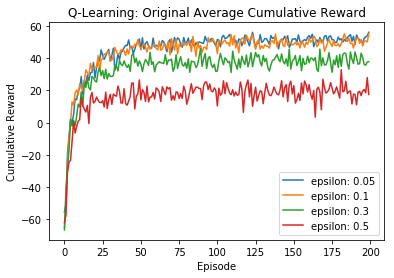

In [5]:
#plot original graph of cumulative rewards for 100 episodes averaged over 100 trials
# plot_filename = "avg_cumulative_reward_q_learning.png"
plot_title = "Q-Learning: Original Average Cumulative Reward"
plot_avg_cumulative_reward(avg_cumulative_reward, plot_legend, plot_title, None, use_ax_limit=False)

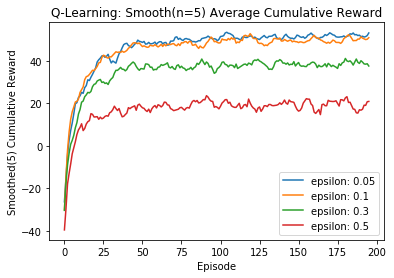

In [6]:
#plot a smoothed graph of cumulative rewards using moving average generated over n=5 samples
# plot_filename = "smooth_n5_avg_cumulative_reward_q_learning.png"
plot_title = "Q-Learning: Smooth(n=5) Average Cumulative Reward"
plot_avg_cumulative_reward(avg_cumulative_reward, plot_legend, plot_title, None, n=5, smooth=True, use_ax_limit=False)

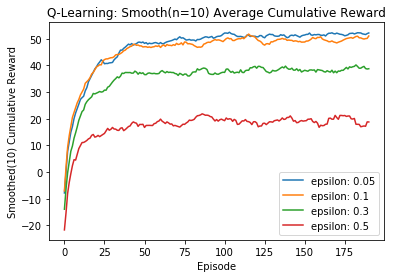

In [7]:
#plot a smoothed graph of cumulative rewards using moving average generated over n=10 samples
# plot_filename = "smooth_n10_avg_cumulative_reward_q_learning.png"
plot_title = "Q-Learning: Smooth(n=10) Average Cumulative Reward"
plot_avg_cumulative_reward(avg_cumulative_reward, plot_legend, plot_title, None, n=10, smooth=True, use_ax_limit=False)

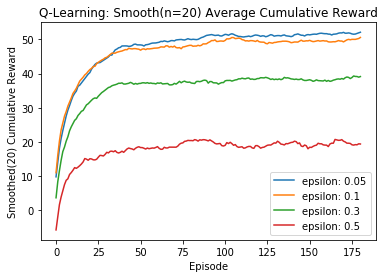

In [8]:
#plot a smoothed graph of cumulative rewards using moving average generated over n=20 samples
# plot_filename = "smooth_n5_avg_cumulative_reward_q_learning.png"
plot_title = "Q-Learning: Smooth(n=20) Average Cumulative Reward"
plot_avg_cumulative_reward(avg_cumulative_reward, plot_legend, plot_title, None, n=20, smooth=True, use_ax_limit=False)

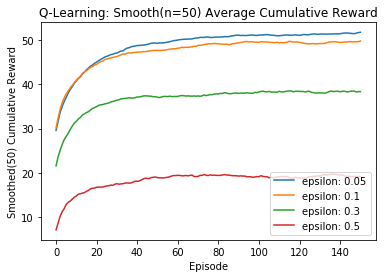

In [9]:
#plot a smoothed graph of cumulative rewards using moving average generated over n=50 samples
# plot_filename = "smooth_n5_avg_cumulative_reward_q_learning.png"
plot_title = "Q-Learning: Smooth(n=50) Average Cumulative Reward"
plot_avg_cumulative_reward(avg_cumulative_reward, plot_legend, plot_title, None, n=50, smooth=True, use_ax_limit=False)

The above 5 graphs show the original cumulative reward curve for 200 episodes averaged over 100 trials during training of Q-learning algorithm. The smoothed curves are generated using moving average of the original rewards curve. The smoothed curves are able to show detailed information regarding the dynamics of the Q-learning training when the curves are very close ($\epsilon=0.05$ and $\epsilon=0.1$).

We can see that the curves for $\epsilon=0.3,0.5$ don't perform very well and only converge to a local optima. The total cumulative reward after 200 episodes is much lower than $\epsilon=0.05,0.1$. This can be attributed to the fact that the exploration is too high and the agent is not able to converge on the actions selected using `argmax Q` operation. As the value of $\epsilon$ is reduced, we see that the cumulative reward begins to rise. The graphs of $\epsilon=0.05$ and $\epsilon=0.1$ are quite close together with minor differences. Because of higher exploration of $\epsilon=0.1$ we see that the curve is faster to climb towards optimal policy. However, because of higher $\epsilon$ value, it doesn't achieve the highest cumulative reward. For the curve of $\epsilon=0.05$, we see that because of low exploration, this curve rises slower than $\epsilon=0.1$, but consistently keeps improving its cumulative reward and policy. Training with $\epsilon=0.05$ generates the best results for the maze environment. If we had set $\epsilon$ to 0, we would have ended up with fully greedy training of Q-learning which would have stabalized at a sub-optimal cumulative reward lower than $\epsilon=0.05$.
We see through this experiment the usefulness of $\epsilon$-greedy exploration. Using the optimal amount of exploration with the optimal amount of training episodes, we can achieve a better policy for the agent than running fully greedy exploitation training.